In [49]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import scipy

In [50]:
path = os.getcwd()
files = os.listdir(path)
filesxlsx = [f for f in files if f[-4:] == 'xlsx']
filesxlsx

['T22-25-2025-13-41.xlsx',
 'T22-25-2025-13-46.xlsx',
 'T22-25-2025-13-48.xlsx',
 'T22-25-2025-13-47.xlsx',
 'T22-25-2025-13-43.xlsx',
 'T22-25-2025-13-42.xlsx',
 'T22-25-2025-13-49.xlsx',
 'T22-25-2025-13-44.xlsx',
 'T22-25-2025-13-45.xlsx',
 'T22-25-2025-13-40.xlsx']

In [51]:
xrange = 51
ydata = np.zeros((xrange,len(filesxlsx)))

filenum = -1
for filepath in filesxlsx:
    filenum += 1
    df = pd.read_excel(filepath, sheet_name=None)
    for i, elem in enumerate(df['data'].y):
        ydata[i][filenum] = elem
        
ydata_ave = [np.average(measurements) for measurements in ydata]
ydata_std = [np.std(measurements) for measurements in ydata]
x_data = df['data'].x

In [52]:
print(len(np.array(ydata)))

51


<ErrorbarContainer object of 3 artists>

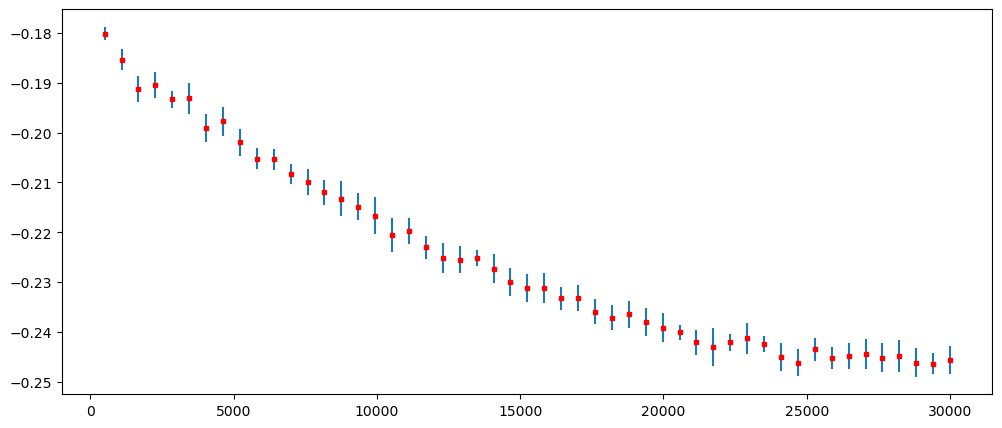

In [53]:
plt.figure(figsize=(12,5))

plt.errorbar(x_data, ydata_ave, ydata_std, marker='s', mfc='red',
         mec='red', ls="None", ms=3)

In [54]:
def fit(t, T2, A, zero):
    return A*np.exp(-t/T2) + zero

In [55]:
parameters, covariance = scipy.optimize.curve_fit(fit, x_data, ydata_ave, p0 = [15000, 0.07, -0.25])
parameters, covariance = scipy.optimize.curve_fit(fit, x_data, ydata_ave, p0 = parameters)

In [56]:
T2, A, zero = parameters
x_fit = np.arange(np.array(x_data)[0],np.array(x_data)[-1],0.1)
y_fit = fit(x_fit, T2, A, zero)

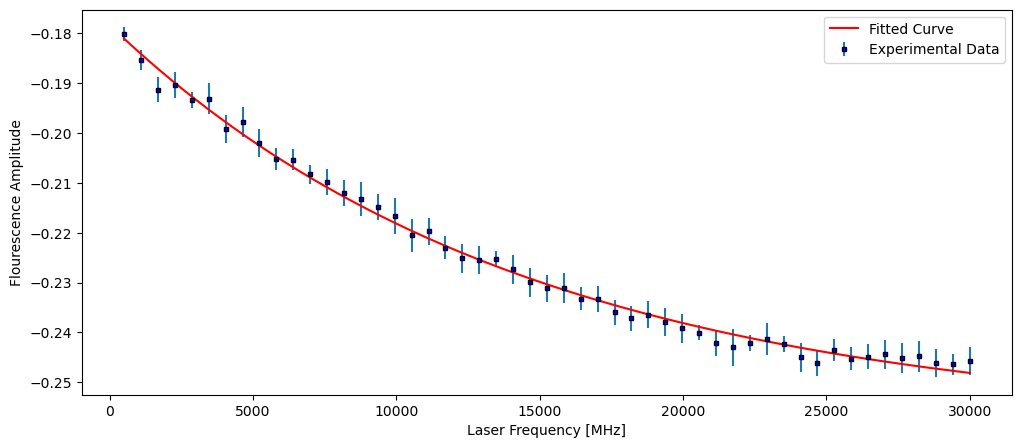

In [57]:
plt.figure(figsize=(12,5))

plt.errorbar(x_data, ydata_ave, ydata_std, marker='s', mfc='blue',
         mec='black', ls="None", ms=3, label = 'Experimental Data')
plt.plot(x_fit, y_fit, 'red', label = 'Fitted Curve')
#plt.vlines(w1,-0.901,-0.8925, 'green', ls=':', label = 'Fitted Resonant Frequency for $M_s=-1$,\n$\omega_{-1}=$'+str(np.round(w1,2)))
#plt.vlines(w2,-0.901,-0.8925, 'purple', ls='--', label = 'Fitted Resonant Frequency for $M_s=+1$,\n$\omega_{+1}=$'+str(np.round(w2,2)))
plt.xlabel("Laser Frequency [MHz]")
plt.ylabel("Flourescence Amplitude")
plt.legend()

In [58]:
dT2, dA, dzero= np.sqrt(np.diagonal(covariance))
print("T2: ", T2, "+-", dT2) 
print("A: ", A, "+-", dA) 
print("zero:", zero, "+-", dzero)

T2:  14466.511038021388 +- 630.5205943943702
A:  0.07978243903839544 +- 0.0011390927174675582
zero: -0.25814091251971266 +- 0.0014102098094868325
